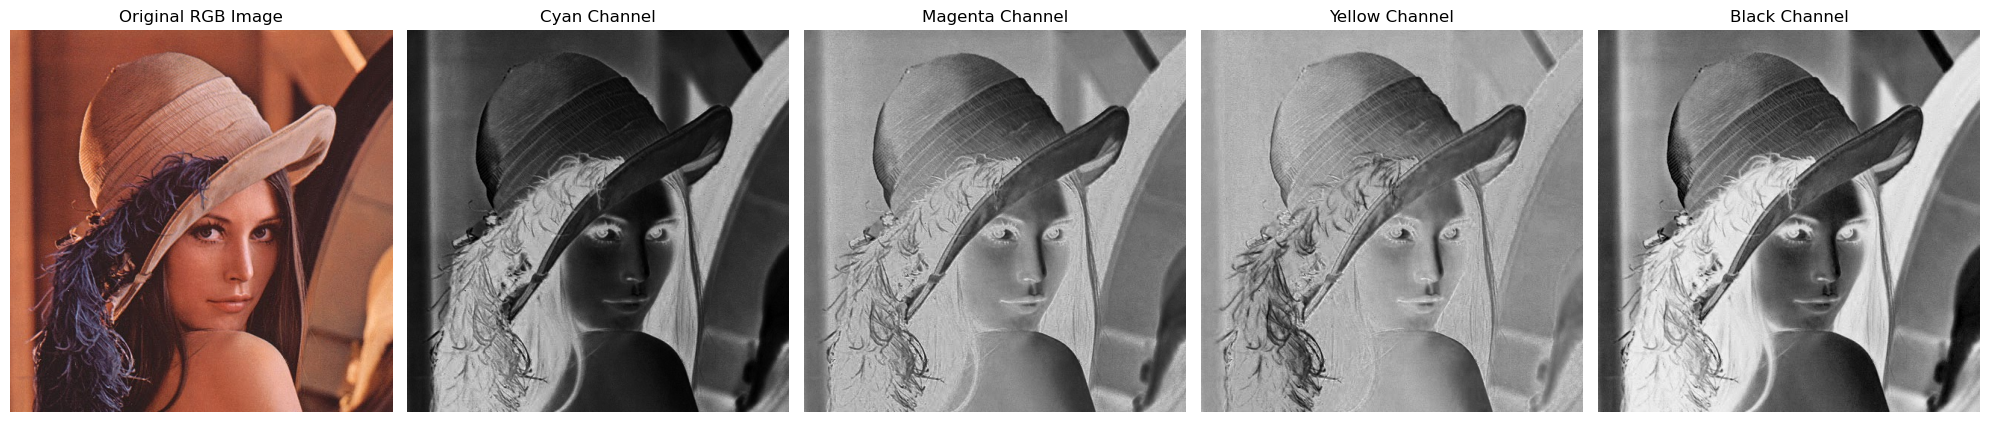

CMYK image saved to output_cmyk.png.


In [3]:
"""
This program demonstrates the theoretical and practical concepts of color model transformation 
by converting an image from the RGB color model to the CMYK color model. Below are the key 
theoretical concepts incorporated into the program:

1. **Color Models**:
   - The RGB (Red, Green, Blue) color model is widely used in digital displays and image processing.
   - The CMYK (Cyan, Magenta, Yellow, Black) color model is commonly used in printing, where colors are 
     created by subtracting wavelengths from white light.

2. **Black Component (K)**:
   - The CMYK model introduces a black (K) component to improve contrast, reduce ink usage, and 
     enhance print quality. The `k_factor` in this program allows users to adjust the intensity 
     of the black component, giving flexibility in the transformation.

3. **Mathematical Transformation**:
   - RGB values are normalized to the range [0, 1].
   - The black (K) component is calculated as the complement of the maximum RGB intensity.
   - Cyan (C), Magenta (M), and Yellow (Y) are calculated by subtracting normalized RGB values 
     from 1 and accounting for the black component.

4. **Practical Implementation**:
   - The program uses the Python libraries `Pillow` (PIL) for image manipulation, `Numpy` for 
     numerical computations, and `Matplotlib` for visualizing the original RGB image and CMYK components.
   - The CMYK transformation is performed pixel-by-pixel, combining the results into a single image.

5. **Error Handling**:
   - The program includes error handling for file operations to ensure the image path is valid.

6. **Visualization**:
   - The program provides a visual comparison of the original RGB image and the CMYK components, 
     enabling users to understand the transformation process.

7. **Customizability**:
   - The `k_factor` parameter allows users to control the intensity of the black component (K), 
     enabling experimentation with different settings.

Use Case:
This program can be used in applications like:
   - Image processing and analysis.
   - Color transformations for printing.
   - Educational tools to demonstrate color theory concepts.

Dependencies:
   - Python libraries: `os`, `numpy`, `Pillow (PIL)`, and `matplotlib`.

Execution Instructions:
   - Place the input image file (e.g., 'lena_color.jpg') in the specified path.
   - Run the program to see the CMYK transformation and visualized results.
   - The output CMYK image will be saved as 'output_cmyk.png' in the current directory.
"""

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to transform RGB to CMYK with adjustable K
def rgb_to_cmyk(image, k_factor=1.0):
    """
    Converts an RGB image to the CMYK color model with an adjustable K (black) factor.

    Parameters:
    - image: Input image in RGB format (PIL Image object).
    - k_factor: Scaling factor for the black component (default = 1.0).

    Returns:
    - cmyk_image: Numpy array of the CMYK image, scaled to [0, 255].
    """
    # Normalize RGB values to [0, 1]
    rgb = np.array(image) / 255.0
    R, G, B = rgb[..., 0], rgb[..., 1], rgb[..., 2]
    
    # Calculate K (black component)
    K = k_factor * (1 - np.max(rgb, axis=2))
    
    # Avoid division by zero for white areas
    K[K == 1] = 0.9999

    # Calculate CMY components
    C = (1 - R - K) / (1 - K)
    M = (1 - G - K) / (1 - K)
    Y = (1 - B - K) / (1 - K)
    
    # Combine CMYK components into one array
    C = (C * 255).astype(np.uint8)
    M = (M * 255).astype(np.uint8)
    Y = (Y * 255).astype(np.uint8)
    K = (K * 255).astype(np.uint8)
    
    cmyk_image = np.stack((C, M, Y, K), axis=2)
    return cmyk_image

# Function to display RGB and CMYK components
def display_images(original_image, cmyk_image):
    """
    Displays the original RGB image and the CMYK components (Cyan, Magenta, Yellow, Black).

    Parameters:
    - original_image: Original image in RGB format (PIL Image object).
    - cmyk_image: CMYK image as a numpy array.
    """
    # Separate CMYK components
    C, M, Y, K = cmyk_image[..., 0], cmyk_image[..., 1], cmyk_image[..., 2], cmyk_image[..., 3]
    
    # Plot original RGB image and CMYK components
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    axes[0].imshow(original_image)
    axes[0].set_title("Original RGB Image")
    axes[0].axis('off')
    
    axes[1].imshow(C, cmap='gray')
    axes[1].set_title("Cyan Channel")
    axes[1].axis('off')
    
    axes[2].imshow(M, cmap='gray')
    axes[2].set_title("Magenta Channel")
    axes[2].axis('off')
    
    axes[3].imshow(Y, cmap='gray')
    axes[3].set_title("Yellow Channel")
    axes[3].axis('off')
    
    axes[4].imshow(K, cmap='gray')
    axes[4].set_title("Black Channel")
    axes[4].axis('off')
    
    plt.tight_layout()
    plt.show()

# Main program
if __name__ == "__main__":
    # Load an image
    image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Replace with your image path
    try:
        original_image = Image.open(image_path).convert("RGB")
    except FileNotFoundError:
        print(f"Error: File not found at {image_path}. Please check the file path.")
        exit()

    # Convert RGB to CMYK with an adjustable K factor (e.g., 0.7)
    k_factor = 0.7  # Adjust K factor as needed (range: 0 to 1)
    cmyk_image = rgb_to_cmyk(original_image, k_factor=k_factor)
    
    # Display original and CMYK components
    display_images(original_image, cmyk_image)
    
    # Save the CMYK image (optional)
    cmyk_output_path = "output_cmyk.png"
    Image.fromarray(cmyk_image).save(cmyk_output_path)
    print(f"CMYK image saved to {cmyk_output_path}.")
